Posterior (Boltzmann) summary:
  Mean:        1.7106
  Median:      1.7070
  95% interval: [1.4617, 1.9786]


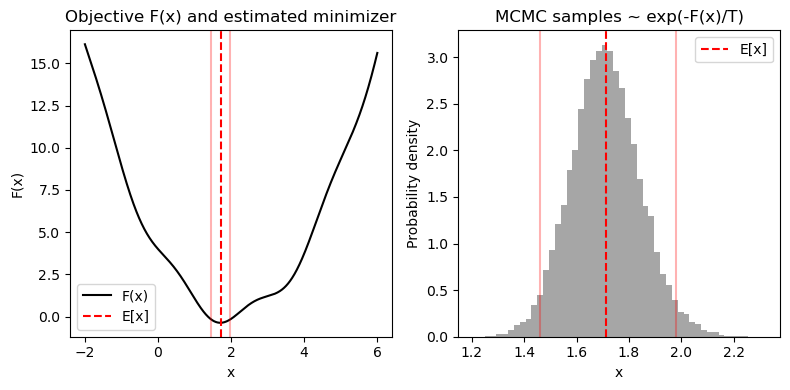

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define a 1D “objective” F(x) we want to minimize.
#    Here is an example with two local minima:
def F(x):
    return (x - 2.0)**2 + np.sin(3.0 * x) * 0.5

# 2) Set up Metropolis–Hastings to sample from pi(x) ∝ exp( -F(x)/T )
T = 0.1                  # “temperature” (make smaller to concentrate near minima)
xmin, xmax = -2.0, 6.0   # search interval

def log_pi(x):
    """Unnormalized log of Boltzmann density at x."""
    return -F(x) / T

# 3) MCMC parameters
n_iter   = 50000    # total MCMC steps
burn_in  = 10000    # discard first burn_in samples
step_std = 0.5      # standard deviation of Gaussian proposal

# 4) Storage for the chain
chain = np.zeros(n_iter)

# 5) Initialize at a random point in [xmin, xmax]
x_curr = np.random.uniform(xmin, xmax)
logp_curr = log_pi(x_curr)

for m in range(n_iter):
    # 5a) Propose x_prop ~ N(x_curr, step_std^2)
    x_prop = x_curr + step_std * np.random.randn()
    
    # 5b) If proposal is outside [xmin, xmax], reject immediately:
    if (x_prop < xmin) or (x_prop > xmax):
        chain[m] = x_curr
        continue
    
    # 5c) Compute log-prob at proposal
    logp_prop = log_pi(x_prop)
    
    # 5d) Acceptance probability
    log_accept_ratio = logp_prop - logp_curr
    if np.log(np.random.rand()) < log_accept_ratio:
        # accept
        x_curr = x_prop
        logp_curr = logp_prop
    # else: reject, keep x_curr
    
    chain[m] = x_curr

# 6) Discard burn-in
samples = chain[burn_in:]

# 7) Compute summary statistics
x_mean   = np.mean(samples)
x_median = np.median(samples)
x_lo95   = np.percentile(samples, 2.5)
x_hi95   = np.percentile(samples, 97.5)

print("Posterior (Boltzmann) summary:")
print(f"  Mean:        {x_mean:.4f}")
print(f"  Median:      {x_median:.4f}")
print(f"  95% interval: [{x_lo95:.4f}, {x_hi95:.4f}]")

# 8) Plot the results
xx = np.linspace(xmin, xmax, 1000)
plt.figure(figsize=(8,4))

# 8a) Plot F(x)
plt.subplot(1,2,1)
plt.plot(xx, F(xx), 'k-', label='F(x)')
plt.axvline(x_mean,   color='r', linestyle='--', label='E[x]')
plt.axvline(x_lo95,   color='r', alpha=0.3)
plt.axvline(x_hi95,   color='r', alpha=0.3)
plt.title("Objective F(x) and estimated minimizer")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()

# 8b) Plot histogram of samples
plt.subplot(1,2,2)
plt.hist(samples, bins=50, density=True, color='gray', alpha=0.7)
plt.axvline(x_mean,   color='r', linestyle='--', label='E[x]')
plt.axvline(x_lo95,   color='r', alpha=0.3)
plt.axvline(x_hi95,   color='r', alpha=0.3)
plt.title("MCMC samples ~ exp(-F(x)/T)")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()

plt.tight_layout()
plt.show()


Posterior summaries (6‐dimensional):
  coord 1: mean = 1.7125, 95% CI = [1.4627, 1.9640]
  coord 2: mean = 1.7098, 95% CI = [1.4551, 1.9771]
  coord 3: mean = 1.7162, 95% CI = [1.4667, 1.9823]
  coord 4: mean = 1.7189, 95% CI = [1.4604, 1.9805]
  coord 5: mean = 1.7094, 95% CI = [1.4657, 1.9690]
  coord 6: mean = 1.7176, 95% CI = [1.4743, 1.9880]


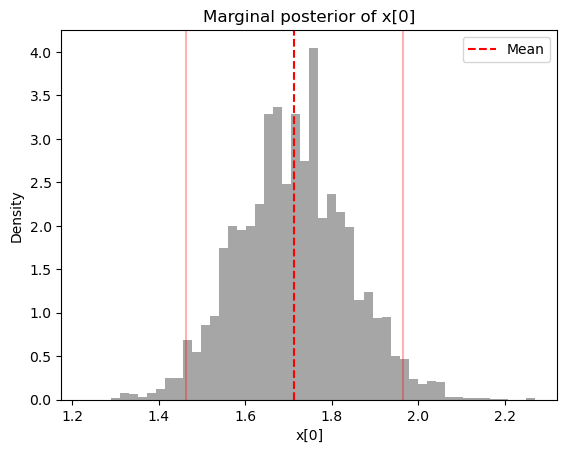

In [2]:
import numpy as np

# -------------------------------------------------------
# 1) Define a 6‐dimensional objective function F(x).
#    Here we sum a 1D “wiggly quadratic” over all 6 coordinates:
def F(x):
    """
    x: numpy array of shape (6,)
    Returns: scalar F(x)
    """
    # For each coordinate xi, use (xi - 2)^2 + 0.5*sin(3*xi)
    # Then sum over i = 0..5.
    return np.sum((x - 2.0)**2 + 0.5 * np.sin(3.0 * x))

# -------------------------------------------------------
# 2) We will sample from the Boltzmann distribution
#      π(x) ∝ exp(−F(x)/T)
#    on the box [xmin, xmax]^6, using Metropolis–Hastings.

T = 0.1                  # “temperature” (smaller → tighter around minima)
dim = 6                  # dimensionality
xmin, xmax = -2.0, 6.0   # search bounds in each coordinate

def log_pi(x):
    """Unnormalized log‐density of π(x) = exp(−F(x)/T)"""
    return -F(x) / T

# -------------------------------------------------------
# 3) MCMC parameters
n_iter   = 100000     # total MCMC steps
burn_in  = 20000      # burn‐in
step_std = 0.3        # proposal std dev (for each coordinate, isotropic)

# Storage for the chain: a (n_iter × dim) array
chain = np.zeros((n_iter, dim))

# 4) Initialize chain at a random point in [xmin, xmax]^6
x_curr = np.random.uniform(xmin, xmax, size=dim)
logp_curr = log_pi(x_curr)

# 5) Metropolis–Hastings loop
for m in range(n_iter):
    # 5a) Propose a new point x_prop = x_curr + N(0, step_std^2 I)
    x_prop = x_curr + step_std * np.random.randn(dim)
    
    # 5b) If any coordinate of x_prop is outside [xmin, xmax], reject immediately
    if np.any(x_prop < xmin) or np.any(x_prop > xmax):
        chain[m] = x_curr
        continue
    
    # 5c) Compute log‐prob at proposal
    logp_prop = log_pi(x_prop)
    
    # 5d) Accept/reject step
    if np.log(np.random.rand()) < (logp_prop - logp_curr):
        x_curr, logp_curr = x_prop, logp_prop
    
    chain[m] = x_curr

# -------------------------------------------------------
# 6) Discard burn‐in and keep the rest
samples = chain[burn_in:]  # shape = (n_iter - burn_in, dim)

# 7) Summarize posterior for each coordinate:
posterior_mean   = np.mean(samples, axis=0)
posterior_median = np.median(samples, axis=0)
posterior_lo95   = np.percentile(samples, 2.5, axis=0)
posterior_hi95   = np.percentile(samples, 97.5, axis=0)

print("Posterior summaries (6‐dimensional):")
for i in range(dim):
    print(f"  coord {i+1}: mean = {posterior_mean[i]:.4f}, "
          f"95% CI = [{posterior_lo95[i]:.4f}, {posterior_hi95[i]:.4f}]")

# -------------------------------------------------------
# (Optional) Visual check of one coordinate's marginal histogram
# e.g. coordinate 0
import matplotlib.pyplot as plt

plt.hist(samples[:, 0], bins=50, density=True, color='gray', alpha=0.7)
plt.axvline(posterior_mean[0], color='r', linestyle='--', label='Mean')
plt.axvline(posterior_lo95[0], color='r', alpha=0.3)
plt.axvline(posterior_hi95[0], color='r', alpha=0.3)
plt.title("Marginal posterior of x[0]")
plt.xlabel("x[0]")
plt.ylabel("Density")
plt.legend()
plt.show()


True weights: [ 1.5 -2.   0.5  3.  -1.   2.5]
Posterior means (SGHMC): [ 1.40599021 -1.99500916  0.54296422  2.98747012 -1.00102465  2.51154621]
95% CI for each coordinate:
  w[0]  ∈  [-0.247,  3.034]
  w[1]  ∈  [-3.669,  -0.282]
  w[2]  ∈  [-1.101,  2.188]
  w[3]  ∈  [1.203,  4.806]
  w[4]  ∈  [-2.938,  0.944]
  w[5]  ∈  [0.607,  4.433]


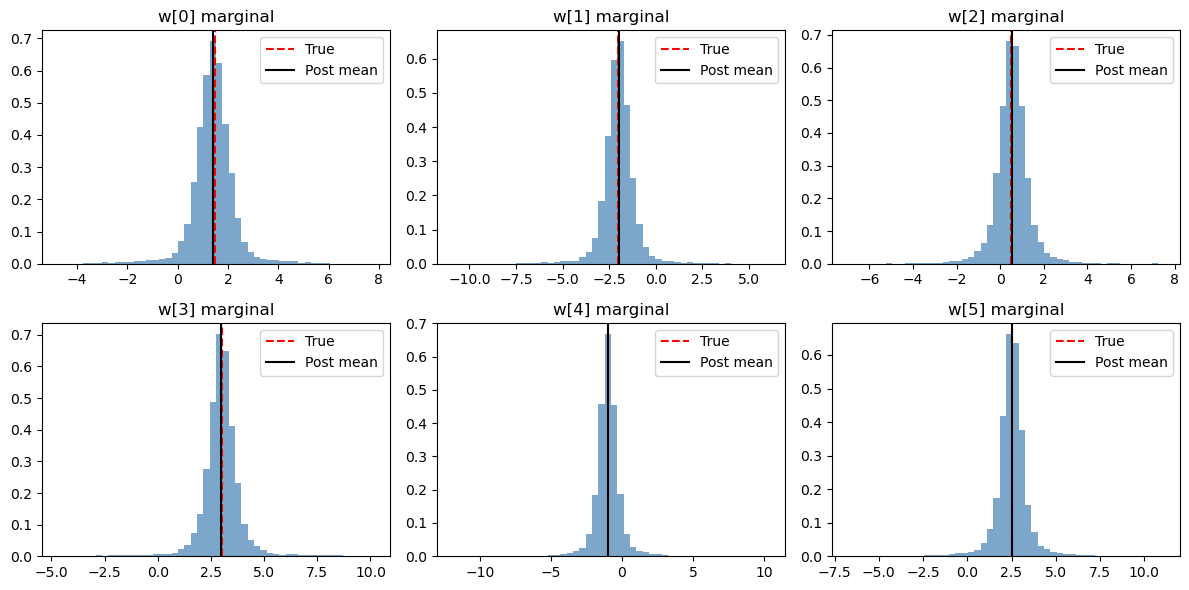

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) Generate synthetic data for Bayesian linear regression in 6D.
#    y = X w_true + noise,  where w_true is 6-dimensional.
np.random.seed(42)
n_data = 500      # number of data points
dim    = 6        # dimensionality of w

# True regression weights (unknown in inference)
w_true = np.array([1.5, -2.0, 0.5,  3.0, -1.0, 2.5])

# Design matrix X: shape (n_data, dim)
X = np.random.randn(n_data, dim)

# Observation noise standard deviation
sigma_obs = 0.5

# Generate noisy observations
y = X.dot(w_true) + sigma_obs * np.random.randn(n_data)

# ----------------------------------------
# 2) Define prior and negative log-posterior U(w) and its gradient.
#    Prior: w ~ N(0, σ_prior^2 I).  We set σ_prior = 1.0
sigma_prior = 1.0

def U_full(w):
    """
    Full negative log-posterior (up to an additive constant):
      U(w) = (1/(2 σ_obs^2)) ||X w - y||^2  +  (1/(2 σ_prior^2)) ||w||^2
    """
    # Data fit term
    resid = X.dot(w) - y             # shape (n_data,)
    data_term = 0.5 / (sigma_obs**2) * np.dot(resid, resid)
    # Prior term
    prior_term = 0.5 / (sigma_prior**2) * np.dot(w, w)
    return data_term + prior_term

def grad_U_minibatch(w, idx_batch):
    """
    Stochastic gradient of U(w) using a minibatch of indices idx_batch.
    If batch_size = len(idx_batch), we scale the data‐term gradient by (n_data / batch_size).
    """
    Xb = X[idx_batch, :]    # shape (batch_size, dim)
    yb = y[idx_batch]       # shape (batch_size,)

    # Compute gradient of (1/(2 σ_obs^2)) ||X w - y||^2 w.r.t. w on the minibatch
    resid_b = Xb.dot(w) - yb       # shape (batch_size,)
    grad_data_b = (1.0 / (sigma_obs**2)) * (Xb.T.dot(resid_b))  # shape (dim,)

    # Scale up to approximate full gradient
    scale = float(n_data) / len(idx_batch)
    grad_data = scale * grad_data_b

    # Gradient of prior term (1/(2 σ_prior^2)) ||w||^2  →  (1/σ_prior^2) w
    grad_prior = (1.0 / (sigma_prior**2)) * w

    return grad_data + grad_prior  # shape (dim,)

# ----------------------------------------
# 3) SGHMC hyperparameters and initialization
n_iter      = 20000       # total SGHMC iterations
burn_in     = 5000        # burn-in to discard
batch_size  = 64          # minibatch size
eta         = 1e-4        # step size (learning rate)
alpha       = 0.01        # friction (momentum decay)
hatB        = 0.0         # we set hatB = 0 (ignore extra Fisher noise estimate)

# Precompute 2*(alpha - hatB)*eta for noise covariance
noise_var = 2.0 * (alpha - hatB) * eta

# Storage for the chain
chain = np.zeros((n_iter, dim))

# Initialize w and momentum v
w_curr = np.zeros(dim)   # start from zero
v_curr = np.zeros(dim)   # initial momentum

# ----------------------------------------
# 4) Main SGHMC loop
for t in range(n_iter):
    # 4a) Sample a random minibatch of indices
    idx_batch = np.random.choice(n_data, batch_size, replace=False)

    # 4b) Compute stochastic gradient of U at w_curr
    gradU = grad_U_minibatch(w_curr, idx_batch)

    # 4c) Update momentum:  v ← (1 - alpha) v  -  eta * gradU  +  Normal(0, noise_var * I)
    noise = np.sqrt(noise_var) * np.random.randn(dim)
    v_curr = (1.0 - alpha) * v_curr - eta * gradU + noise

    # 4d) Update position:  w ← w + v
    w_curr = w_curr + v_curr

    # 4e) Store sample
    chain[t, :] = w_curr

# ----------------------------------------
# 5) Discard burn-in samples
samples = chain[burn_in:, :]   # shape = ((n_iter - burn_in), dim)

# 6) Compute summary stats: posterior mean and 95% credible intervals for each coordinate
post_mean    = np.mean(samples, axis=0)
post_lo95    = np.percentile(samples, 2.5,  axis=0)
post_hi95    = np.percentile(samples, 97.5, axis=0)

print("True weights:", w_true)
print("Posterior means (SGHMC):", post_mean)
print("95% CI for each coordinate:")
for i in range(dim):
    print(f"  w[{i}]  ∈  [{post_lo95[i]:.3f},  {post_hi95[i]:.3f}]")

# ----------------------------------------
# 7) (Optional) Plot marginal histograms for each coordinate
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i in range(dim):
    ax = axes[i]
    ax.hist(samples[:, i], bins=50, density=True, alpha=0.7, color='steelblue')
    ax.axvline(w_true[i], color='r', linestyle='--', label='True')
    ax.axvline(post_mean[i], color='k', linestyle='-', label='Post mean')
    ax.set_title(f"w[{i}] marginal")
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import torch
import torch.optim as optim


def latin_hypercube_sampling(num_samples: int, dim: int) -> np.ndarray:
    """
    Generate `num_samples` points in [0,1]^dim via Latin Hypercube Sampling (LHS).
    Returns an (num_samples × dim) numpy array in [0,1].
    """
    # Step 1: create the intervals [0,1]/num_samples
    # For each dimension, we will choose one point in each of the num_samples strata.
    # We first create a (num_samples × dim) grid of “strata indices” and then sample uniformly within each stratum.
    
    #  1.1. For each dimension j, create an array [0,1,...,num_samples-1], then randomly permute it.
    #  1.2. That permutation array tells us which stratum each sample will occupy in dimension j.
    #  1.3. Within each stratum i (i / num_samples to (i+1)/num_samples), we draw one uniform random number.
    
    # Initialize result array
    result = np.zeros((num_samples, dim), dtype=np.float64)
    
    # For each dimension, generate a random permutation of strata indices [0..num_samples-1]
    for j in range(dim):
        perm = np.random.permutation(num_samples)
        # Now perm[i] is the strata index for sample i in dimension j.
        # For sample i, the coordinate in [0,1] will be:
        #   (perm[i] + U_i) / num_samples,  where U_i ~ Uniform(0,1).
        u = np.random.rand(num_samples)  # one uniform draw per sample in this dimension
        result[:, j] = (perm + u) / num_samples
    
    return result


def multi_start_adam(
    loss_fn,
    dim: int,
    lower_bound: torch.Tensor,
    upper_bound: torch.Tensor,
    num_starts: int = 20,
    adam_lr: float = 1e-2,
    adam_steps: int = 500,
    device: torch.device = torch.device('cuda'),
) -> (torch.Tensor, float):
    """
    Multi‐start Adam optimizer with Latin Hypercube Sampling for initial points.
    
    Args:
        loss_fn:        function taking a torch.Tensor of shape (d,) → scalar loss (torch scalar).
                        (Must work on CUDA if device='cuda'.)
        dim:            dimensionality of the design space (d).
        lower_bound:    torch.Tensor of shape (d,) giving lower bounds on each dimension.
        upper_bound:    torch.Tensor of shape (d,) giving upper bounds on each dimension.
                        Both should be on the same device as specified (e.g. 'cuda').
        num_starts:     number of LHS starting points (N).
        adam_lr:        learning rate for Adam.
        adam_steps:     number of gradient steps for each run.
        device:         torch.device('cpu') or torch.device('cuda'). Typically 'cuda'.
    
    Returns:
        best_x:   torch.Tensor of shape (d,) corresponding to the best solution found.
        best_loss: float, the minimum loss value achieved.
    """
    # 1) Generate N points in [0,1]^d via LHS, then scale to [lower_bound, upper_bound].
    lhs_unit = latin_hypercube_sampling(num_starts, dim)   # shape (N, d) in [0,1]
    
    # Convert LHS to torch and scale to [lower, upper]
    # scaled_sample = lower + (upper - lower) * lhs_unit
    lb = lower_bound.to(device)
    ub = upper_bound.to(device)
    span = ub - lb
    
    # We'll store best‐so‐far
    best_x = None
    best_loss = float('inf')
    
    for i in range(num_starts):
        # 2) For each i, form initial point
        init_np = lhs_unit[i, :]  # shape (d,)
        init_torch = lb + span * torch.from_numpy(init_np.astype(np.float32)).to(device)
        # We need a Parameter (requires_grad=True) so that Adam can update it
        x = init_torch.clone().detach().requires_grad_(True).to(device)
        
        # 3) Create Adam optimizer for this single tensor
        optimizer = optim.Adam([x], lr=adam_lr)
        
        # 4) Run Adam for adam_steps
        for step in range(adam_steps):
            optimizer.zero_grad()
            loss = loss_fn(x)             # should return a 0-dim torch.Tensor on same device
            loss.backward()
            optimizer.step()
        # after loop, x is the final point, and loss is the final loss
        final_loss = float(loss.item())
        final_x = x.detach().clone()
        
        # 5) Track global best
        if final_loss < best_loss:
            best_loss = final_loss
            best_x = final_x
    
    return best_x, best_loss


# -------------------------------------------
# 3. Example Usage with a Toy Function in 3D
# -------------------------------------------

if __name__ == "__main__":
    # (A) Define dimension and bounds
    d = 3
    # Suppose our true minimum is at x* = [1.0, -2.0, 0.5], but the function is nonconvex.
    lower = torch.tensor([-5.0, -5.0, -5.0], device='cuda')
    upper = torch.tensor([+5.0, +5.0, +5.0], device='cuda')
    
    # (B) Define a toy (nonconvex) loss function f(x).
    #     For instance: f(x) = sum( (x - a)^2 ) + sin( sum(x) )
    a = torch.tensor([1.0, -2.0, 0.5], device='cuda')
    def toy_loss_fn(x_tensor: torch.Tensor) -> torch.Tensor:
        # x_tensor has shape (3,) on CUDA
        quadratic = torch.sum((x_tensor - a) ** 2)
        sinusoidal = torch.sin(torch.sum(x_tensor))
        return quadratic + 0.5 * sinusoidal
    
    # (C) Run our multi‐start Adam
    best_solution, best_value = multi_start_adam(
        loss_fn=toy_loss_fn,
        dim=d,
        lower_bound=lower,
        upper_bound=upper,
        num_starts=30,
        adam_lr=1e-2,
        adam_steps=300,
        device=torch.device('cuda')
    )
    
    print("Best final loss found:", best_value)
    print("Best x found:", best_solution.cpu().numpy())


Best final loss found: -0.3392454981803894
Best x found: [ 0.8530048 -2.1469996  0.3518006]
